In [237]:
import networkx as nx
G = nx.karate_club_graph()
type(G)

networkx.classes.graph.Graph

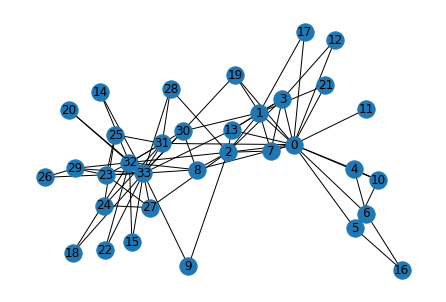

In [238]:
nx.draw(G, with_labels=True)

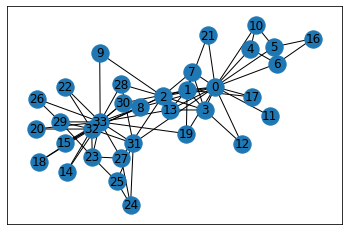

In [239]:
nx.draw_networkx(G, with_labels=True)

In [240]:
def average_degree(G): # 可以将G作为传入参数，但不能在该函数内调用G自带的函数
    num_edges = G.number_of_edges()
    num_nodes = G.number_of_nodes()
    average_degree = 2*num_edges / num_nodes
    return round(average_degree)

average_degree = average_degree(G)
print(average_degree)

5


In [241]:
def average_clustering_coefficient(G):
    avg_cluster_coef = round(nx.algorithms.average_clustering(G), 2)
    return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print(avg_cluster_coef)

0.57


In [242]:
def one_iter_pagerank(G, beta, r0, node_id):
    r1 = 0
    for n in G.neighbors(r1):
        # print(n)
        r1 += round(beta*n / G.degree(n) + (1-beta)/G.number_of_nodes(), 2)
    return r1

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print(r1)

49.47


In [243]:
def closeness_centrality(G, node=5):
    closeness = 0
    for n in G.nodes():
        if n == node:
            continue
        closeness += len(nx.algorithms.shortest_path(G, n, node))
    closeness = 1/closeness
    return round(closeness, 2)

node = 5
closeness = closeness_centrality(G, node=node)
print(closeness)

0.01


In [244]:
import torch
print(torch.__version__)
ones = torch.ones(3, 4)
print(ones)
zeros = torch.zeros(3, 4)
print(zeros)
random_tensor = torch.rand(3, 4)
print(random_tensor)
print(ones.shape)
print(zeros.dtype)

1.12.1
tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.2417, 0.9127, 0.7875, 0.6463],
        [0.1192, 0.1317, 0.9079, 0.4481],
        [0.0022, 0.4382, 0.3800, 0.5075]])
torch.Size([3, 4])
torch.float32


In [245]:
zeros = torch.zeros(3, 4, dtype=torch.float64)
print(zeros.dtype)
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float64
torch.int64


In [246]:
def graph_to_edge_list(G):
    edge_list = []
    for (e1,e2) in G.edges():
        edge_list.append((e1, e2))
    return edge_list

def edge_list_to_tensor(edge_list):
    edge_index = torch.tensor([])
    print(edge_index)
    edge_index = torch.Tensor(edge_list).T
    return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print(pos_edge_index.shape)
print(torch.sum(pos_edge_index))
print(pos_edge_index.dtype)

tensor([])
torch.Size([2, 78])
tensor(2535.)
torch.float32


In [247]:
import random
def sample_negative_edges(G, num_neg_samples):
    neg_edge_list = []
    for idx, e in enumerate(nx.non_edges(G)):
        if idx >= num_neg_samples:
            break
        neg_edge_list.append((e[0], e[1]))
        # print(e)
    return neg_edge_list

neg_edge_list = sample_negative_edges(G, len(pos_edge_list))
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print(neg_edge_index.shape)
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)
for idx, e in enumerate([edge_1, edge_2, edge_3, edge_4, edge_5]):
    if e[1] in G.neighbors(e[0]):
        print(idx+1, 'Pos')
    else:
        print(idx+1, 'Neg')

tensor([])
torch.Size([2, 78])
1 Pos
2 Neg
3 Pos
4 Pos
5 Neg


In [248]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print(emb_sample)

Embedding(4, 8)


In [249]:
id = torch.LongTensor([1])
print(id.dtype)
print(emb_sample(id))
ids = torch.LongTensor([1, 3])
# import torch.nn.functional as F
# ids = F.one_hot(ids)
print(ids.dtype)
print(emb_sample(ids))

torch.int64
tensor([[-4.4258e-01, -1.5349e+00,  1.1118e-03, -8.3201e-01,  6.3567e-01,
         -7.7746e-01, -5.5710e-02, -4.4338e-02]], grad_fn=<EmbeddingBackward0>)
torch.int64
tensor([[-4.4258e-01, -1.5349e+00,  1.1118e-03, -8.3201e-01,  6.3567e-01,
         -7.7746e-01, -5.5710e-02, -4.4338e-02],
        [ 4.5921e-01,  8.7926e-02,  9.4428e-01, -7.5985e-01,  1.6396e+00,
         -1.9154e+00, -1.8657e+00, -6.7076e-01]], grad_fn=<EmbeddingBackward0>)


In [250]:
shape = emb_sample.weight.data.shape
print(shape)
emb_sample.weight.data = torch.ones(shape)
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward0>)


In [251]:
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
    emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)
    emb.weight.data = torch.rand(emb.weight.data.shape)
    return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])
print(emb)
print("-"*50)
print(emb(ids))

Embedding(34, 16)
--------------------------------------------------
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


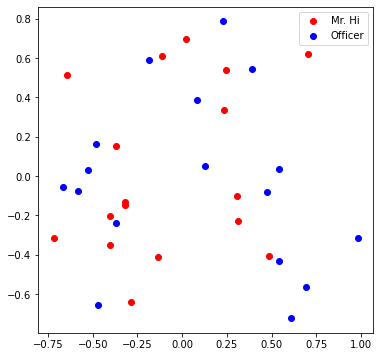

In [252]:
def visualize_emb(emb):
    X = emb.weight.data.numpy()
    pca = PCA(n_components=2)
    components = pca.fit_transform(X)
    # print(X.shape) # (34, 16)
    # print(components.shape) # (34, 2)
    plt.figure(figsize=(6, 6))
    club1_x = []
    club1_y = []
    club2_x = []
    club2_y = []
    for node in G.nodes(data=True):
        # print(node[0])
        # print(node[1])
        if node[1]["club"] == "Mr. Hi":
            club1_x.append(components[node[0]][0])
            club1_y.append(components[node[0]][1])
        else:
            club2_x.append(components[node[0]][0])
            club2_y.append(components[node[0]][1])
    plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
    plt.scatter(club2_x, club2_y, color ="blue", label="Officer")
    plt.legend()
    plt.show()

visualize_emb(emb)

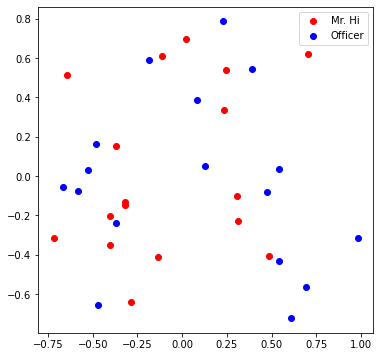

C:\Users\lzy\AppData\Local\Temp\ipykernel_13176\4123925010.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_edge = torch.tensor(train_edge).to(torch.int64)


torch.Size([2, 78]) torch.Size([2, 78]) torch.Size([2, 156])
0 2.058701753616333 0.5
1 2.0307703018188477 0.5
2 1.9782708883285522 0.5
3 1.9047260284423828 0.5
4 1.8137493133544922 0.5
5 1.709014892578125 0.5
6 1.5942412614822388 0.5
7 1.4731687307357788 0.5
8 1.3495244979858398 0.5
9 1.2269327640533447 0.5
10 1.1087920665740967 0.5
11 0.9981116056442261 0.4936
12 0.8973435759544373 0.5192
13 0.8082467317581177 0.5705
14 0.7317992448806763 0.5769
15 0.6681656837463379 0.5833
16 0.6167290806770325 0.6282
17 0.5762264132499695 0.6859
18 0.5449926257133484 0.6987
19 0.5212453603744507 0.7179
20 0.5033189654350281 0.7115
21 0.48979631066322327 0.7308
22 0.479544460773468 0.7244
23 0.471691757440567 0.7436
24 0.4655790627002716 0.7628
25 0.4607079327106476 0.7564
26 0.4566973149776459 0.7949
27 0.45325127243995667 0.8205
28 0.4501377046108246 0.8205
29 0.44717568159103394 0.8077
30 0.44422706961631775 0.8077
31 0.44119173288345337 0.8141
32 0.43800291419029236 0.8141
33 0.43462255597114563 

In [253]:
from torch.optim import SGD
def accuracy(pred, label):
    accu = round((((pred>0.5)==label).sum()/pred.shape[0]).item(), 4)
    return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
    epochs = 500
    learning_rate = 0.1
    optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)
    for i in range(epochs):
        # print(train_edge.shape)
        x = emb(train_edge)
        # print(x.shape)
        x = sigmoid((x[0]*x[1]).sum(dim=-1))
        # print(x.shape)
        loss = loss_fn(x, train_label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(i, loss.item(), accuracy(x, train_label))

visualize_emb(emb)
loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()
pos_label = torch.ones(pos_edge_index.shape[1])
neg_label = torch.zeros(neg_edge_index.shape[1])
train_label = torch.cat([pos_label, neg_label], dim=0)
# print(train_label.shape)
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
# print(train_edge.dtype)
train_edge = torch.tensor(train_edge).to(torch.int64)
# print(train_edge.dtype)
print(pos_edge_index.shape, neg_edge_index.shape, train_edge.shape)

train(emb, loss_fn, sigmoid, train_label, train_edge)

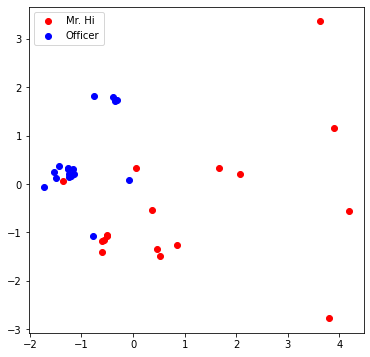

In [254]:
visualize_emb(emb)